In [1]:
import requests
import os
import pandas as pd
import numpy as np
import sqlite3
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_url1 = 'https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/EDGAR/datasets/v61_AP/NMVOC/v61_AP_NMVOC_1970_2018b.zip'
data_name1 = 'emissions'

In [3]:
data_url2 = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/GWA02/CSV/1.0/en'
data_name2 = 'treat_waste'

In [4]:
data_url3 = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/GWA01/CSV/1.0/en'
data_name3 = 'generate_waste'

In [5]:
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

Directory 'data' created.


In [6]:
df_xls=None

with urlopen(data_url1) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        for file in zfile.namelist():
            if not file.endswith('_readme.html'):
#                 zfile.extract(member=file, path=data_dir)
#                 os.rename(os.path.join(data_dir, file), os.path.join(data_dir, 'NMVOC_emissions.xlsx')) 
#                 print(f"File '{file}' extracted and renamed.")
                with zfile.open(file) as excel_file_content:
                       df_xls = pd.read_excel(excel_file_content,skiprows=9)
            
print('zip file imported and created draframe from xlsx file')
df_xls.head()


zip file imported and created draframe from xlsx file


,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,NMVOC,bio,3.923100e-07,3.846070e-07,...,0.000019,0.000022,0.000016,0.000016,0.000017,0.000025,0.000034,0.000033,0.000029,0.000029
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,NMVOC,bio,2.401770e-03,2.354610e-03,...,0.001008,0.000968,0.001099,0.000951,0.000797,0.000780,0.000771,0.000766,0.000789,0.000789
2,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,NMVOC,bio,2.914097e-04,2.833714e-04,...,0.000411,0.000393,0.000273,0.000261,0.000239,0.000283,0.000283,0.000265,0.000272,0.000272
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,NMVOC,bio,1.929064e-05,1.858688e-05,...,0.000305,0.000289,0.000240,0.000248,0.000258,0.000283,0.000329,0.000304,0.000310,0.000310
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,NMVOC,bio,2.092784e-04,1.976777e-04,...,0.001552,0.001518,0.000676,0.000687,0.001515,0.002353,0.002647,0.002752,0.002856,0.003250


In [7]:
columns_to_keep = ['ipcc_code_2006_for_standard_report_name'] + [f'Y_{year}' for year in range(2004, 2019)]
columns_to_drop = ['Name','IPCC_annex', 'C_group_IM24_sh', 'Country_code_A3', 'ipcc_code_2006_for_standard_report', 'Substance', 'fossil_bio']

# Filter and rename columns
IE_rows = df_xls.drop(columns=columns_to_drop).loc[df_xls['Name'] == 'Ireland', columns_to_keep].rename(
    columns={'ipcc_code_2006_for_standard_report_name': 'Emission Sector'}
)
IE_rows.dropna(inplace=True)
IE_rows.reset_index(inplace=True, drop =True)

IE_rows.head()

,Emission Sector,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,Main Activity Electricity and Heat Production,0.047544,0.057158,0.060680,0.084272,0.096694,0.116276,0.141250,0.148788,0.188029,0.198669,0.215291,0.190792,0.273089,0.292018,0.292018
1,Manufacturing Industries and Construction,0.670301,0.857457,0.878340,0.822509,0.869472,0.897183,0.891920,0.834491,0.777768,0.828829,1.017577,1.067445,1.063665,1.255148,1.255148
2,Residential and other sectors,1.801438,2.219582,2.513526,2.741511,2.518783,2.495006,2.292305,2.003496,1.429387,1.572863,2.344561,1.986087,1.841100,1.768696,1.897216
3,Emissions from biomass burning,0.454820,0.354977,0.353629,0.350116,0.401103,0.376501,0.372729,0.427636,0.386539,0.492477,0.504074,0.513859,0.445393,0.455365,0.366924
4,Incineration and Open Burning of Waste,0.000893,0.000568,0.000585,0.000023,0.000022,0.000023,0.000043,0.000147,0.000036,0.000025,0.000013,0.000014,0.000015,0.000016,0.000017


In [8]:
# # for col in IE_rows.columns:
# #     print(f"Unique values in {col}: {IE_rows[col].unique()}")
# unique_emission_sectors_df = pd.DataFrame(IE_rows, columns=['Emission Sector'])
# unique_emission_sectors_df

In [9]:
db_full_path = os.path.join(data_dir, data_name1)
db_con1 = sqlite3.connect(db_full_path)
IE_rows.to_sql('emissions', db_con1, if_exists='replace', index=False)
# db_con1.commit()
db_con1.close()

In [11]:
df_treat = pd.read_csv(data_url2)
columns_to_drop = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'C04253V05027', 'C04251V05025','C04252V05026','UNIT']

df_treat = df_treat.drop(columns=columns_to_drop)
df_treat.dropna(inplace=True)
# Remove rows with 'total waste' in the 'Waste Category' column
df_treat = df_treat[df_treat['Waste Category'] != 'Total waste']
df_treat.reset_index(inplace=True, drop =True)
df_treat.head()

db_full_path = os.path.join(data_dir, data_name2)
db_con2 = sqlite3.connect(db_full_path)
df_treat.to_sql('treatment', db_con2, if_exists='replace', index=False)
# db_con3.commit()
db_con2.close()

In [12]:
df_gen = pd.read_csv(data_url3)

columns_to_drop = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'C014259V05033', 'C04253V05027','C04251V05025','UNIT']

df_gen = df_gen.drop(columns=columns_to_drop)
df_gen.dropna(inplace=True)

# Remove rows with 'total waste' in the 'Waste Category' column
df_gen = df_gen[df_gen['Waste Category'] != 'Total waste']
df_gen.reset_index(inplace=True, drop =True)
df_gen.head()

db_full_path = os.path.join(data_dir, data_name3)
db_con3 = sqlite3.connect(db_full_path)
df_gen.to_sql('generate', db_con3, if_exists='replace', index=False)
# db_con3.commit()
db_con3.close()

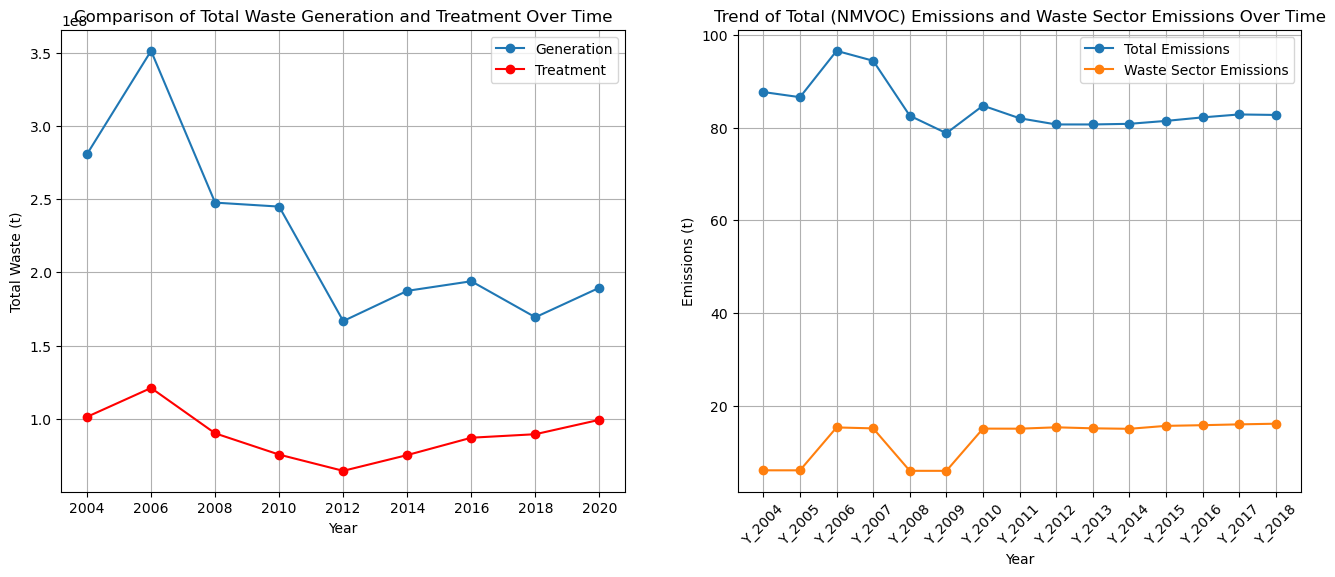

In [13]:
# Calculate the total waste generated for each year
total_waste_gen_by_year = df_gen.groupby('Year')['VALUE'].sum()
# Calculate the total waste treated for each year
total_waste_treat_by_year = df_treat.groupby('Year')['VALUE'].sum()

waste_emissions_df = IE_rows[IE_rows['Emission Sector'].isin(['Solid Waste Disposal', 
                                                             'Incineration and Open Burning of Waste', 
                                                             'Biological Treatment of Solid Waste'])]
# Now, let's calculate the total waste emissions for each year
waste_emissions_by_year = waste_emissions_df.iloc[:, 1:].sum()
# Now, let's calculate the total emissions for all sectors for each year
total_emissions_by_year = IE_rows.iloc[:, 1:].sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#trend of total waste generation over time
axes[0].plot(total_waste_gen_by_year.index, total_waste_gen_by_year.values, marker='o', linestyle='-', label='Generation')
axes[0].plot(total_waste_treat_by_year.index, total_waste_treat_by_year.values, marker='o', linestyle='-', color='red', label='Treatment')
axes[0].set_title('Comparison of Total Waste Generation and Treatment Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Waste (t)')
axes[0].legend()
axes[0].grid(True)

#trend of total emissions and waste emissions over time
axes[1].plot(total_emissions_by_year.index, total_emissions_by_year.values, marker='o', linestyle='-', label='Total Emissions')
axes[1].plot(waste_emissions_by_year.index, waste_emissions_by_year.values, marker='o', linestyle='-', label='Waste Sector Emissions')
axes[1].set_title('Trend of Total (NMVOC) Emissions and Waste Sector Emissions Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Emissions (t)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(total_emissions_by_year.index)
axes[1].tick_params(axis='x', rotation=45)